In [865]:
# Importing Library -------------%%%%

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [866]:
# Authenticating Users ------------%%%%%%
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [867]:
# Impoting datasets ----------%%%%%


downloaded = drive.CreateFile({'id':'1HjJVhAW5ShUhjP_Te_shHfwb1SL9_g3f'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202007-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1JrcFOpE8pt_cW3WSRgqcphraBCeB8DHT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202008-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1zu983Np-KB-wr-yY7Eg0kiaiwrtSoeBq'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202009-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1-kL0EZFg0sBvQt22H3hnrEYu_zlo9gLy'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202010-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'12LPyXWsaBkfdiz3DRvy0t21dMBOzdbNP'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202011-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1K1igSICfeeVjMjORyURLSpFRwHTJSX4U'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202012-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1qJBayETBuDdfsBFsS2BHbsyDh7LDx6Ov'}) # replace the id with id of file you want to access
downloaded.GetContentFile('TEMP_USA.csv')

In [868]:
#importing Temperature dataset 
temp = pd.read_csv("TEMP_USA.csv") 
temp.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,PS,T2M_MAX,T2M_MIN,T2M_RANGE
0,38.91041,-76.83579,2017,1,1,0.01,4.11,101.72,11.38,-0.01,11.39
1,38.91041,-76.83579,2017,1,2,8.00,5.24,101.99,6.64,4.19,2.45
2,38.91041,-76.83579,2017,1,3,18.74,5.72,100.38,8.02,5.30,2.72
3,38.91041,-76.83579,2017,1,4,0.20,4.57,99.94,12.05,-0.93,12.98
4,38.91041,-76.83579,2017,1,5,0.24,2.49,100.99,0.82,-2.88,3.70


In [869]:
# Station status dataset ---------%%%%%%%%%
station_status = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/station_status.csv") 
station_status.head()

,data__stations__is_installed,data__stations__num_bikes_disabled,data__stations__is_returning,data__stations__station_status,data__stations__last_reported,data__stations__eightd_has_available_keys,data__stations__legacy_id,data__stations__num_ebikes_available,data__stations__is_renting,data__stations__num_docks_disabled,data__stations__num_docks_available,data__stations__num_bikes_available,data__stations__station_id,last_updated,ttl
0,1,1,1,active,1599426428,False,1,0,1,0,11,3,1,1.599427e+09,5.0
1,1,1,1,active,1599421244,False,2,0,1,0,9,1,2,NaN,NaN
2,1,0,1,active,1599424089,False,3,0,1,0,1,16,3,NaN,NaN
3,1,0,1,active,1599426176,False,4,0,1,0,8,3,4,NaN,NaN
4,1,0,1,active,1599424516,False,5,0,1,0,7,4,5,NaN,NaN


In [870]:
# Importing capitalbikeshare-tripdata dataset
data1 = pd.read_csv("202008-capitalbikeshare-tripdata.csv") 
data1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,95D0E56BC37512F2,docked_bike,2020-08-26 20:07:36,2020-08-26 20:36:16,Army Navy Dr & S Joyce St,31006.0,N Lynn St & Fairfax Dr,31917.0,38.863700,-77.063300,38.893860,-77.070862,member
1,787142FE24DA497D,docked_bike,2020-08-02 17:54:57,2020-08-02 18:12:36,22nd & P ST NW,31285.0,14th & Upshur St NW,31406.0,38.909394,-77.048728,38.942475,-77.032678,member
2,BE6C2BFB2C0A6CD6,docked_bike,2020-08-11 18:55:15,2020-08-11 19:16:30,Prince George's Plaza Metro,32420.0,Queens Chapel & Hamilton St,32410.0,38.965742,-76.954803,38.954600,-76.959500,casual
3,7EEF58C1346E290C,docked_bike,2020-08-01 13:51:47,2020-08-01 14:09:52,Rhode Island & Connecticut Ave NW,31239.0,11th & Park Rd NW,31651.0,38.905995,-77.039802,38.931322,-77.028247,casual
4,61DE8A9F22D88C38,docked_bike,2020-08-21 19:31:56,2020-08-21 19:49:17,Market Square / King St & Royal St,31042.0,King St & Patrick St,31044.0,38.804718,-77.043363,38.805317,-77.049883,member


In [871]:
# Balancing dataset

data1['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data1.rideable_type	]
 
data1['rideable_type'].value_counts()

1    201992
0     49611
Name: rideable_type, dtype: int64

In [872]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data1[data1.rideable_type == 1]
df_minority = data1[data1.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49611,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data1_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data1_downsampled.rideable_type.value_counts()

1    49611
0    49611
Name: rideable_type, dtype: int64

In [873]:
# Balanced Dataset

data1_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data1_downsampled.rideable_type	]
 
data1_downsampled['rideable_type'].value_counts()

docked_bike      49611
electric_bike    49611
Name: rideable_type, dtype: int64

In [874]:
# Importing capitalbikeshare-tripdata dataset

data2 = pd.read_csv("202009-capitalbikeshare-tripdata.csv") 
data2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,02C8003EE103FB10,docked_bike,2020-09-18 17:28:03,2020-09-18 18:28:31,5th St & Massachusetts Ave NW,31265.0,5th St & Massachusetts Ave NW,31265.0,38.90093,-77.018677,38.90093,-77.018677,casual
1,B3CCC49A34A718DC,electric_bike,2020-09-29 18:41:26,2020-09-29 19:05:59,NaN,NaN,NaN,NaN,38.90000,-77.050000,38.90000,-76.980000,casual
2,8F6A634D2E73B432,electric_bike,2020-09-29 07:47:38,2020-09-29 08:01:04,NaN,NaN,NaN,NaN,38.90000,-76.980000,38.90000,-77.000000,casual
3,BCF6943D9FD02C9B,electric_bike,2020-09-29 19:50:38,2020-09-29 20:08:08,NaN,NaN,NaN,NaN,38.91000,-77.030000,38.90000,-77.000000,casual
4,D91499AB0FB94DCF,electric_bike,2020-09-28 20:36:51,2020-09-28 21:01:34,NaN,NaN,NaN,NaN,38.92000,-77.030000,38.90000,-77.000000,casual


In [875]:
data2['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data2.rideable_type	]
 
data2['rideable_type'].value_counts()

1    194225
0     55674
Name: rideable_type, dtype: int64

In [876]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data2[data2.rideable_type == 1]
df_minority = data2[data2.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=55674,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data2_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data2_downsampled.rideable_type.value_counts()

1    55674
0    55674
Name: rideable_type, dtype: int64

In [877]:
# Balanced Dataset

data2_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data2_downsampled.rideable_type	]
 
data2_downsampled['rideable_type'].value_counts()

docked_bike      55674
electric_bike    55674
Name: rideable_type, dtype: int64

In [878]:
# Importing capitalbikeshare-tripdata dataset
data3 = pd.read_csv("202010-capitalbikeshare-tripdata.csv") 
data3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5160990A29898496,electric_bike,2020-10-12 07:38:42,2020-10-12 07:52:38,NaN,NaN,NaN,NaN,38.81,-77.06,38.84000,-77.060000,casual
1,AB3EDB59F4D802E7,electric_bike,2020-10-02 17:58:30,2020-10-02 18:07:45,NaN,NaN,NaN,NaN,38.93,-77.00,38.91000,-77.000000,casual
2,238A92D9D011475D,electric_bike,2020-10-02 00:13:37,2020-10-02 00:21:10,NaN,NaN,NaN,NaN,38.91,-77.04,38.90000,-77.000000,casual
3,59D6EF767F57C139,electric_bike,2020-10-02 16:31:12,2020-10-02 16:42:50,NaN,NaN,NaN,NaN,38.92,-77.03,38.91000,-77.000000,casual
4,A94B93E9E864972A,electric_bike,2020-10-19 21:33:46,2020-10-19 21:43:55,NaN,NaN,14th & V St NW,31101.0,38.91,-77.04,38.91769,-77.031821,casual


In [879]:
data3['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data3.rideable_type	]
 
data3['rideable_type'].value_counts()

1    180231
0     49601
Name: rideable_type, dtype: int64

In [880]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data3[data3.rideable_type == 1]
df_minority = data3[data3.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49601,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data3_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data3_downsampled.rideable_type.value_counts()

1    49601
0    49601
Name: rideable_type, dtype: int64

In [881]:
# Balanced Dataset

data3_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data3_downsampled.rideable_type	]
 
data3_downsampled['rideable_type'].value_counts()

docked_bike      49601
electric_bike    49601
Name: rideable_type, dtype: int64

In [882]:
# Importing capitalbikeshare-tripdata dataset

data4 = pd.read_csv("202007-capitalbikeshare-tripdata.csv") 
data4.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.87670,-77.017800,casual
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.88044,-77.025236,casual
2,FBE8E99BAAED0455,electric_bike,2020-07-22 09:47:52,2020-07-22 09:53:38,NaN,NaN,NaN,NaN,38.920000,-77.000000,38.92000,-77.010000,casual
3,E7950C376FD263E4,electric_bike,2020-07-22 10:36:55,2020-07-22 10:49:03,NaN,NaN,NaN,NaN,38.920000,-77.010000,38.92000,-77.000000,casual
4,0149F273572ED43F,electric_bike,2020-07-22 15:53:55,2020-07-22 15:58:47,NaN,NaN,NaN,NaN,38.910000,-77.050000,38.90000,-77.050000,casual


In [883]:
data4['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data4.rideable_type	]
 
data4['rideable_type'].value_counts()

1    212516
0     15786
Name: rideable_type, dtype: int64

In [884]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data4[data4.rideable_type == 1]
df_minority = data4[data4.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=15786,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data4_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data4_downsampled.rideable_type.value_counts()

1    15786
0    15786
Name: rideable_type, dtype: int64

In [885]:
# Balanced Dataset

data4_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data4_downsampled.rideable_type	]
 
data4_downsampled['rideable_type'].value_counts()

docked_bike      15786
electric_bike    15786
Name: rideable_type, dtype: int64

In [886]:
# Importing capitalbikeshare-tripdata dataset

data5 = pd.read_csv("202011-capitalbikeshare-tripdata.csv") 
data5.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EAF58AB55323A15E,docked_bike,2020-11-02 18:41:34,2020-11-02 18:49:04,17th & K St NW / Farragut Square,31233.0,15th & P St NW,31201.0,38.902061,-77.038322,38.909868,-77.034421,casual
1,DBD5BC10E1F0C019,docked_bike,2020-11-07 17:24:13,2020-11-07 17:24:48,New Jersey Ave & F St NW,31655.0,New Jersey Ave & F St NW,31655.0,38.897108,-77.011616,38.897108,-77.011616,member
2,64776A208DCED86D,docked_bike,2020-11-20 13:28:22,2020-11-20 14:19:26,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049437,38.892244,-77.033234,casual
3,B870C5DC875CA903,docked_bike,2020-11-25 16:02:34,2020-11-25 16:31:31,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049436,38.892244,-77.033234,casual
4,98DEA3EA1A85634F,docked_bike,2020-11-21 10:55:34,2020-11-21 11:12:45,Metro Center / 12th & G St NW,31230.0,2nd & G St NE,31639.0,38.898364,-77.027869,38.899670,-77.003666,casual


In [887]:
data5['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data5.rideable_type	]
 
data5['rideable_type'].value_counts()

1    135343
0     40092
Name: rideable_type, dtype: int64

In [888]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data5[data5.rideable_type == 1]
df_minority = data5[data5.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=40092,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data5_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data5_downsampled.rideable_type.value_counts()

1    40092
0    40092
Name: rideable_type, dtype: int64

In [889]:
# Balanced Dataset

data5_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data5_downsampled.rideable_type	]
 
data5_downsampled['rideable_type'].value_counts()

docked_bike      40092
electric_bike    40092
Name: rideable_type, dtype: int64

In [890]:
# Importing capitalbikeshare-tripdata dataset

data6 = pd.read_csv("202012-capitalbikeshare-tripdata.csv") 
data6.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C04E20007D039277,docked_bike,2020-12-02 09:10:36,2020-12-02 09:24:12,18th St & Wyoming Ave NW,31114.0,18th St & Pennsylvania Ave NW,31242.0,38.918809,-77.041571,38.899680,-77.041539,casual
1,A488C0D9F4761D06,classic_bike,2020-12-31 12:46:29,2020-12-31 14:01:07,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
2,9E7E97A927A85552,classic_bike,2020-12-31 12:47:03,2020-12-31 14:01:04,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
3,565C5C331ABAD77B,classic_bike,2020-12-29 13:50:51,2020-12-29 14:12:22,Wakefield High School,31054.0,S Glebe Rd & Potomac Ave,31010.0,38.847129,-77.112550,38.842600,-77.050200,member
4,7576B3F4B4D6ADFF,classic_bike,2020-12-27 12:30:28,2020-12-27 12:36:12,Washington-Liberty High School / N Stafford St...,31920.0,Virginia Square Metro / Monroe St & 9th St N,31024.0,38.888282,-77.111066,38.882788,-77.103148,member


In [891]:


data6['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data6.rideable_type	]
 
data6['rideable_type'].value_counts()

0    76905
1    28924
Name: rideable_type, dtype: int64

In [892]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data6[data6.rideable_type == 0]
df_minority = data6[data6.rideable_type==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=28924,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data6_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data6_downsampled.rideable_type.value_counts()

1    28924
0    28924
Name: rideable_type, dtype: int64

In [893]:
# Balanced Dataset

data6_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data6_downsampled.rideable_type	]
 
data6_downsampled['rideable_type'].value_counts()

docked_bike      28924
electric_bike    28924
Name: rideable_type, dtype: int64

In [894]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

In [895]:
# dataset merged

data = pd.concat([data1_downsampled, data2_downsampled, data3_downsampled, data4_downsampled, data5_downsampled, data6_downsampled], ignore_index=True)
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479371,8A0B3B755E6F7EF0,docked_bike,2020-12-04 11:56:13,2020-12-04 12:42:19,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479372,A10ED3D50E5AB612,docked_bike,2020-12-12 13:49:55,2020-12-12 14:17:02,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888553,-77.032427,38.892300,-77.043600,casual
479373,F146CC9669ABF5EC,docked_bike,2020-12-03 13:43:26,2020-12-03 14:06:11,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479374,614005BC98FE93F7,docked_bike,2020-12-06 07:27:47,2020-12-06 08:03:46,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888552,-77.032427,38.892300,-77.043600,casual


In [896]:
data['rideable_type'].value_counts()

docked_bike      239688
electric_bike    239688
Name: rideable_type, dtype: int64

In [897]:
 #attributes in capitalbikeshare-tripdata dataset
 dt_column = data.columns
 print('Primary Fields in the Bike-Sharing Dataset')
 print(dt_column)

Primary Fields in the Bike-Sharing Dataset
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [898]:
#information for Bike-sharing dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479376 entries, 0 to 479375
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             479376 non-null  object 
 1   rideable_type       479376 non-null  object 
 2   started_at          479376 non-null  object 
 3   ended_at            479376 non-null  object 
 4   start_station_name  401686 non-null  object 
 5   start_station_id    401686 non-null  float64
 6   end_station_name    394701 non-null  object 
 7   end_station_id      394701 non-null  float64
 8   start_lat           479376 non-null  float64
 9   start_lng           479376 non-null  float64
 10  end_lat             478235 non-null  float64
 11  end_lng             478235 non-null  float64
 12  member_casual       479376 non-null  object 
dtypes: float64(6), object(7)
memory usage: 47.5+ MB
None


In [899]:
#types of ride available
ride_able_no = data['rideable_type'].unique()
print(ride_able_no)
print(len(ride_able_no))

['docked_bike' 'electric_bike']
2


In [900]:
#different start in dataset
start_station_name_no = data['start_station_name'].unique()
print(start_station_name_no)
print('no. of start stations-')
print(len(start_station_name_no))

["10th St & L'Enfant Plaza SW" 'Constitution Ave & 2nd St NW/DOL'
 'Friendship Hts Metro / Wisconsin Ave & Wisconsin Cir'
 'John McCormack Rd NE' '16th & Irving St NW'
 'California St & Florida Ave NW' '10th & E St NW' '14th & Newton St NW'
 '14th & Rhode Island Ave NW' 'Roosevelt Island' '10th & Monroe St NE'
 'Lincoln Park / 13th & East Capitol St NE '
 'Woodglen Dr & Executive Blvd' '18th & R St NW' 'D St & Maryland Ave NE'
 '34th & Water St NW' '24th & N St NW' '14th & Q St NW' 'Gravelly Point'
 'Metro Center / 12th & G St NW' '17th St & Massachusetts Ave NW'
 'Pershing Dr & N George Mason Dr' 'New Hampshire Ave & Ward Pl NW'
 '6th St & Indiana Ave NW' '14th & R St NW' 'Adams Mill & Columbia Rd NW'
 '11th & Kenyon St NW' '7th & K St NW' 'Columbus Circle / Union Station'
 '1st & Washington Hospital Center NW' 'Tanger Outlets'
 'King St Metro North / Cameron St' 'Lincoln Memorial'
 '34th St & Wisconsin Ave NW'
 'Ohio Dr & West Basin Dr SW / MLK & FDR Memorials' '15th & W St NW'
 '14t

In [901]:
# different start station ID 
start_station_id_no = data['start_station_id'].unique()
print(start_station_id_no)
print('no. of start stations id-')
print(len(start_station_id_no))

[31287. 31271. 32014. ... 31938. 31940. 31936.]
no. of start stations id-
1207


In [902]:
#type of member in dataset 
member_casual_no = data['member_casual'].unique()
print(member_casual_no)
print('no. of member_casual-')
print(len(member_casual_no))

['casual' 'member']
no. of member_casual-
2


In [903]:
#different between start ride and end ride to calculate travel time
difference_in_ride = ( pd.to_datetime(data['ended_at']) -  pd.to_datetime(data['started_at'])) 
print(difference_in_ride[1].seconds)
print(difference_in_ride)

287
0        0 days 00:20:23
1        0 days 00:04:47
2        0 days 00:38:58
3        0 days 00:13:53
4        0 days 00:08:33
               ...      
479371   0 days 00:46:06
479372   0 days 00:27:07
479373   0 days 00:22:45
479374   0 days 00:35:59
479375   0 days 00:40:58
Length: 479376, dtype: timedelta64[ns]


In [904]:
data['rideable_type'].value_counts()

docked_bike      239688
electric_bike    239688
Name: rideable_type, dtype: int64

In [905]:
#dropped the null values
data.dropna(subset = ["start_station_name","end_station_name"], inplace=False)
data['rideable_type'].value_counts() 

docked_bike      239688
electric_bike    239688
Name: rideable_type, dtype: int64

In [906]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479371,8A0B3B755E6F7EF0,docked_bike,2020-12-04 11:56:13,2020-12-04 12:42:19,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479372,A10ED3D50E5AB612,docked_bike,2020-12-12 13:49:55,2020-12-12 14:17:02,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888553,-77.032427,38.892300,-77.043600,casual
479373,F146CC9669ABF5EC,docked_bike,2020-12-03 13:43:26,2020-12-03 14:06:11,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479374,614005BC98FE93F7,docked_bike,2020-12-06 07:27:47,2020-12-06 08:03:46,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888552,-77.032427,38.892300,-77.043600,casual


[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000, 50500, 51000, 51500, 52000, 52500, 53000, 53500, 54000, 54500, 55000, 55500, 56000, 56500, 57000, 57500, 58000, 58500, 59000, 59500, 60000, 60500, 61000, 61500, 62000, 62500, 63000, 63500, 64000, 64500, 65000, 65500, 66000, 66500, 67000, 67500, 68000, 68500, 69000, 69500, 70000, 70500, 71000, 71500, 72000, 72500, 7

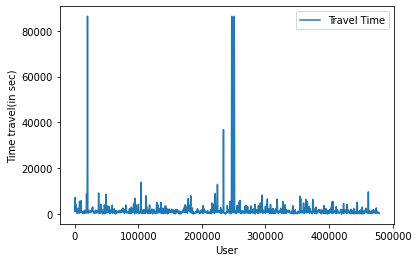

In [907]:
# plotting different travel time of different user
x = []
for i in range(len(difference_in_ride)):
  x.append(difference_in_ride[i].seconds)
for i in range(len(difference_in_ride)):
  difference_in_ride[i]=x[i]

y = [i for i in range(0,len(difference_in_ride),500)]
j=0
k = []
for i in range(0,len(difference_in_ride),500):
  if j < len(difference_in_ride):
    k.append(x[j]) 
    j = j+500
print(y)
print(k)

plt.plot(y, k, label='Travel Time')
plt.xlabel('User') 
plt.ylabel('Time travel(in sec)') 
plt.legend()
plt.show()

In [908]:
data['time_to_travel'] = difference_in_ride
data.head();
data['rideable_type'].value_counts()

docked_bike      239688
electric_bike    239688
Name: rideable_type, dtype: int64

In [909]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual,1223
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual,287
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual,2338
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual,833
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479371,8A0B3B755E6F7EF0,docked_bike,2020-12-04 11:56:13,2020-12-04 12:42:19,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual,2766
479372,A10ED3D50E5AB612,docked_bike,2020-12-12 13:49:55,2020-12-12 14:17:02,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888553,-77.032427,38.892300,-77.043600,casual,1627
479373,F146CC9669ABF5EC,docked_bike,2020-12-03 13:43:26,2020-12-03 14:06:11,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual,1365
479374,614005BC98FE93F7,docked_bike,2020-12-06 07:27:47,2020-12-06 08:03:46,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888552,-77.032427,38.892300,-77.043600,casual,2159


In [910]:

data9 = data[data['time_to_travel'] >= 120]
data9.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual,1223
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual,287
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual,2338
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual,833
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member,513


In [911]:
data9

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual,1223
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual,287
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual,2338
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual,833
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479371,8A0B3B755E6F7EF0,docked_bike,2020-12-04 11:56:13,2020-12-04 12:42:19,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual,2766
479372,A10ED3D50E5AB612,docked_bike,2020-12-12 13:49:55,2020-12-12 14:17:02,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888553,-77.032427,38.892300,-77.043600,casual,1627
479373,F146CC9669ABF5EC,docked_bike,2020-12-03 13:43:26,2020-12-03 14:06:11,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual,1365
479374,614005BC98FE93F7,docked_bike,2020-12-06 07:27:47,2020-12-06 08:03:46,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888552,-77.032427,38.892300,-77.043600,casual,2159


In [912]:
data9['rideable_type'].value_counts()

docked_bike      234141
electric_bike    231737
Name: rideable_type, dtype: int64

In [913]:
data9['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data9.rideable_type	]
 
data9['rideable_type'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    234141
0    231737
Name: rideable_type, dtype: int64

In [914]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data9[data9.rideable_type == 1]
df_minority = data9[data9.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=231737,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data9 = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data9.rideable_type.value_counts()

1    231737
0    231737
Name: rideable_type, dtype: int64

In [915]:
data9['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data9.rideable_type	]
 
data9['rideable_type'].value_counts()

docked_bike      231737
electric_bike    231737
Name: rideable_type, dtype: int64

In [916]:
data9

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
141711,93B3501F458CA64C,docked_bike,2020-09-15 19:24:46,2020-09-15 19:44:39,19th St & Constitution Ave NW,31235.0,California St & Florida Ave NW,31116.0,38.892300,-77.043600,38.917761,-77.040620,member,1193
479368,51B4EF2E7FC494EC,docked_bike,2020-12-05 09:09:04,2020-12-05 09:26:19,11th & S St NW,31280.0,4th St & Madison Dr NW,31288.0,38.913761,-77.027025,38.890496,-77.017246,member,1035
46038,584A8E2124160889,docked_bike,2020-08-07 19:53:38,2020-08-07 20:18:02,1st & M St NE,31603.0,18th St & Wyoming Ave NW,31114.0,38.905697,-77.005483,38.918809,-77.041571,casual,1464
33207,FE7D7691E29255F8,docked_bike,2020-08-19 11:39:32,2020-08-19 11:45:21,14th & R St NW,31202.0,12th & L St NW,31251.0,38.913046,-77.032008,38.903819,-77.028400,member,349
353975,6261B5882BF1274E,docked_bike,2020-11-10 08:12:40,2020-11-10 08:19:18,5th St & Massachusetts Ave NW,31265.0,8th & O St NW,31281.0,38.900930,-77.018677,38.908640,-77.022770,member,398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450447,821451D6CF27EDC8,electric_bike,2020-12-24 22:30:24,2020-12-24 22:38:50,NaN,NaN,8th & O St NW,31281.0,38.910000,-77.000000,38.908706,-77.022685,casual,506
450448,6EFB275A6EC2DAE3,electric_bike,2020-12-12 12:16:33,2020-12-12 12:45:00,1st & Rhode Island Ave NW,31506.0,Jefferson Dr & 14th St SW,31247.0,38.915417,-77.012289,38.888553,-77.032427,member,1707
450449,1FA6D922F87FEE15,electric_bike,2020-12-11 08:50:37,2020-12-11 09:07:33,NaN,NaN,NaN,NaN,38.910000,-77.010000,38.950000,-77.010000,member,1016
450450,5CB3FEC6957B57F8,electric_bike,2020-12-12 14:39:47,2020-12-12 15:00:42,11th & Park Rd NW,31651.0,10th & K St NW,31263.0,38.931322,-77.028247,38.902400,-77.026220,casual,1255


In [917]:
import calendar
v = pd.Series([i for i in range(len(data9))])
data9 = data9.reindex(v)
s = pd.to_datetime(data9['ended_at'])

print(s)
print(s[0].month)
print(s[0].year)
print(s[0].day)
print(s[1].weekday())
print(calendar.day_name[s[1].weekday()])
m1 = []
m2 = []
m3 = []
m4 = []
v=0
for k in range(len(s)):
  m1.append(s[k].month)
for k in range(len(s)):
  m2.append(s[k].year)
for k in range(len(s)):
  m3.append(s[k].day)
#for k in range(len(s)):
 # if s[k] is not None:
  #  m4.append(calendar.day_name[s[k].weekday()])
  #else :
   # m4.append([s[0].weekday()])


0        2020-08-22 17:30:02
1        2020-08-26 13:18:41
2        2020-08-07 17:13:39
3        2020-08-07 20:45:58
4        2020-08-18 13:49:07
                 ...        
463469   2020-12-01 20:34:45
463470   2020-12-05 12:29:49
463471   2020-12-02 14:22:33
463472                   NaT
463473   2020-12-07 11:19:27
Name: ended_at, Length: 463474, dtype: datetime64[ns]
8
2020
22
2
Wednesday


In [918]:
dc = {'ride_id': data9['ride_id'], 'rideable_type': data9['rideable_type'], 'started_at': data9['started_at'], 'MO' : m1, 'YEAR':m2, 'DY':m3, 'start_station_id': data9['start_station_id'], 'end_station_name': data9['end_station_name'], 'end_station_id': data9['end_station_id'], 'time_to_travel': data9['time_to_travel'] } 
df = pd.DataFrame(dc)
df 

,ride_id,rideable_type,started_at,MO,YEAR,DY,start_station_id,end_station_name,end_station_id,time_to_travel
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,8.0,2020.0,22.0,31287.0,13th & E St SE,31607.0,1223
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,8.0,2020.0,26.0,31271.0,New Jersey Ave & F St NW,31655.0,287
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,8.0,2020.0,7.0,32014.0,22nd & P ST NW,31285.0,2338
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,8.0,2020.0,7.0,31528.0,3rd & M St NE,31627.0,833
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,8.0,2020.0,18.0,31122.0,New Hampshire Ave & T St NW,31229.0,513
...,...,...,...,...,...,...,...,...,...,...
463469,079AFBED14617F6D,docked_bike,2020-12-01 20:27:30,12.0,2020.0,1.0,31283.0,7th & S St NW,31130.0,435
463470,E3964F8C9CA9B59D,docked_bike,2020-12-05 12:17:45,12.0,2020.0,5.0,31519.0,14th & R St NW,31202.0,724
463471,7E1A30571CC874FE,docked_bike,2020-12-02 14:10:55,12.0,2020.0,2.0,31519.0,14th & R St NW,31202.0,698
463472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [919]:
result = pd.merge(df, temp, how='left', on=['DY', 'MO','YEAR'])
result


,ride_id,rideable_type,started_at,MO,YEAR,DY,start_station_id,end_station_name,end_station_id,time_to_travel,LAT,LON,PRECTOT,QV2M,PS,T2M_MAX,T2M_MIN,T2M_RANGE
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,8.0,2020.0,22.0,31287.0,13th & E St SE,31607.0,1223,38.91041,-76.83579,1.41,16.29,100.95,27.62,21.81,5.81
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,8.0,2020.0,26.0,31271.0,New Jersey Ave & F St NW,31655.0,287,38.91041,-76.83579,0.05,13.81,100.95,28.90,19.42,9.48
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,8.0,2020.0,7.0,32014.0,22nd & P ST NW,31285.0,2338,38.91041,-76.83579,8.45,17.16,101.24,28.21,22.82,5.39
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,8.0,2020.0,7.0,31528.0,3rd & M St NE,31627.0,833,38.91041,-76.83579,8.45,17.16,101.24,28.21,22.82,5.39
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,8.0,2020.0,18.0,31122.0,New Hampshire Ave & T St NW,31229.0,513,38.91041,-76.83579,0.63,12.70,100.64,28.61,16.87,11.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463469,079AFBED14617F6D,docked_bike,2020-12-01 20:27:30,12.0,2020.0,1.0,31283.0,7th & S St NW,31130.0,435,38.91041,-76.83579,0.05,4.08,100.16,7.48,2.27,5.20
463470,E3964F8C9CA9B59D,docked_bike,2020-12-05 12:17:45,12.0,2020.0,5.0,31519.0,14th & R St NW,31202.0,724,38.91041,-76.83579,34.13,4.70,100.48,8.65,2.14,6.50
463471,7E1A30571CC874FE,docked_bike,2020-12-02 14:10:55,12.0,2020.0,2.0,31519.0,14th & R St NW,31202.0,698,38.91041,-76.83579,0.00,3.39,101.42,7.89,-0.18,8.07
463472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [920]:
s1 = result.query('start_station_id == 31131')
s1 = s1.sort_values(by=['DY'])
s1.head()

,ride_id,rideable_type,started_at,MO,YEAR,DY,start_station_id,end_station_name,end_station_id,time_to_travel,LAT,LON,PRECTOT,QV2M,PS,T2M_MAX,T2M_MIN,T2M_RANGE
304542,38CC0B59BBA1AAB7,electric_bike,2020-10-01 23:50:17,10.0,2020.0,1.0,31131.0,14th & R St NW,31202.0,451,38.91041,-76.83579,3.48,9.47,100.80,22.98,12.76,10.22
298860,D766D225BB19C08D,electric_bike,2020-10-01 22:14:10,10.0,2020.0,1.0,31131.0,NaN,NaN,253,38.91041,-76.83579,3.48,9.47,100.80,22.98,12.76,10.22
454503,224D509F7EF06649,docked_bike,2020-12-01 09:53:57,12.0,2020.0,1.0,31131.0,15th & Euclid St NW,31117.0,444,38.91041,-76.83579,0.05,4.08,100.16,7.48,2.27,5.20
413969,0DB8E4DEC6954727,electric_bike,2020-11-01 19:41:55,11.0,2020.0,1.0,31131.0,NaN,NaN,1268,38.91041,-76.83579,12.77,6.65,101.05,15.09,4.99,10.10
224968,36C7207CE537F80A,docked_bike,2020-10-01 09:41:46,10.0,2020.0,1.0,31131.0,Adams Mill & Columbia Rd NW,31104.0,498,38.91041,-76.83579,3.48,9.47,100.80,22.98,12.76,10.22


In [921]:
s6 =s1.groupby(["rideable_type","DY"])
s6

In [922]:
s4 = temp.query('YEAR == 2020 and MO == 4')
s4 = s4.sort_values(by=['MO'])
s4.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,PS,T2M_MAX,T2M_MIN,T2M_RANGE
1186,38.91041,-76.83579,2020,4,1,0.52,5.09,100.43,12.17,4.31,7.85
1213,38.91041,-76.83579,2020,4,28,0.37,6.20,101.59,15.45,6.76,8.69
1212,38.91041,-76.83579,2020,4,27,0.98,5.49,101.05,14.42,5.76,8.66
1211,38.91041,-76.83579,2020,4,26,9.30,8.03,100.27,15.87,8.78,7.10
1210,38.91041,-76.83579,2020,4,25,3.14,7.13,101.08,16.33,8.40,7.92


In [923]:
sa =s1.groupby(["DY","MO","PS","T2M_RANGE","T2M_MAX","T2M_MIN",'QV2M',"rideable_type"]).size()
s5 = []
s6 = []
sa = pd.DataFrame(sa,columns=['count'])
modified = sa.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
sb = s1[['DY','MO','time_to_travel']]
modified['docked_b'] = s5
modified['electric_b'] = s6
#modified = pd.merge(modified, sb, how="left", on=["DY", "MO"])
#sb
modified

[0, 5, 0, 4, 0, 4, 0, 8, 0, 1, 0, 6, 0, 2, 0, 7, 0, 2, 0, 0, 7, 0, 3, 0, 4, 0, 6, 0, 4, 0, 5, 0, 3, 0, 3, 0, 6, 0, 4, 0, 4, 0, 8, 0, 3, 0, 3, 0, 2, 0, 1, 0, 7, 0, 2, 0, 6, 0, 2, 0, 9, 0, 7, 0, 3, 0, 6, 0, 1, 0, 21, 0, 7, 0, 5, 0, 12, 0, 1, 0, 5, 12, 0, 5, 0, 4, 0, 6, 0, 9, 0, 5, 0, 13, 0, 6, 0, 4, 0, 6, 0, 3, 0, 2, 0, 3, 5, 0, 10, 0, 4, 0, 4, 0, 5, 0, 9, 0, 5, 0, 9, 0, 3, 0, 5, 4, 0, 7, 0, 2, 0, 5, 0, 3, 1, 0, 11, 0, 8, 0, 6, 0, 6, 2, 0, 4, 0, 9, 0, 7, 0, 5, 2, 0, 6, 0, 5, 0, 6, 0, 4, 4, 0, 6, 0, 4, 0, 12, 0, 4, 4, 0, 1, 0, 7, 0, 4, 4, 0, 3, 0, 5, 0, 17, 0, 14, 0, 2, 5, 0, 3, 0, 5, 0, 8, 0, 7, 6, 0, 4, 0, 9, 0, 3, 0, 6, 1, 0, 2, 0, 10, 0, 4, 0, 4, 5, 0, 5, 0, 2, 0, 6, 0, 3, 1, 0, 7, 0, 4, 2, 0, 7, 6, 0, 5, 0, 5, 0, 9, 0, 5, 5, 0, 3, 0, 4, 0, 3, 0, 2, 6, 0, 6, 0, 5, 0, 2, 0, 1, 6, 0, 5, 0, 5, 0, 2, 0, 5, 4, 0, 6, 0, 8, 0, 4, 0, 8, 5, 0, 3, 0, 6, 2]
[7, 0, 6, 0, 8, 0, 2, 0, 6, 0, 4, 0, 5, 0, 4, 0, 2, 0, 10, 3, 0, 5, 0, 12, 0, 6, 0, 5, 0, 2, 0, 4, 0, 2, 0, 2, 0, 6, 0, 6, 0, 9, 0, 4, 0, 4,

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,rideable_type,count,docked_b,electric_b
0,1.0,8.0,100.75,9.18,31.66,22.47,16.24,docked_bike,7,7,0
1,1.0,8.0,100.75,9.18,31.66,22.47,16.24,electric_bike,5,0,5
2,1.0,9.0,101.14,7.04,26.71,19.67,15.25,docked_bike,6,6,0
3,1.0,9.0,101.14,7.04,26.71,19.67,15.25,electric_bike,4,0,4
4,1.0,10.0,100.80,10.22,22.98,12.76,9.47,docked_bike,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...
278,31.0,8.0,101.10,5.34,24.41,19.08,12.92,docked_bike,1,1,0
279,31.0,8.0,101.10,5.34,24.41,19.08,12.92,electric_bike,3,0,3
280,31.0,10.0,102.50,7.36,11.13,3.76,4.52,docked_bike,2,2,0
281,31.0,10.0,102.50,7.36,11.13,3.76,4.52,electric_bike,6,0,6


In [924]:
 modified.reset_index(inplace=True, drop=True)
modified.sort_values(['DY', 'MO'], ascending=[True, False])


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,rideable_type,count,docked_b,electric_b
8,1.0,12.0,100.16,5.20,7.48,2.27,4.08,docked_bike,6,6,0
9,1.0,12.0,100.16,5.20,7.48,2.27,4.08,electric_bike,1,0,1
6,1.0,11.0,101.05,10.10,15.09,4.99,6.65,docked_bike,2,2,0
7,1.0,11.0,101.05,10.10,15.09,4.99,6.65,electric_bike,8,0,8
4,1.0,10.0,100.80,10.22,22.98,12.76,9.47,docked_bike,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...
282,31.0,12.0,101.72,5.28,7.10,1.82,4.93,electric_bike,2,0,2
280,31.0,10.0,102.50,7.36,11.13,3.76,4.52,docked_bike,2,2,0
281,31.0,10.0,102.50,7.36,11.13,3.76,4.52,electric_bike,6,0,6
278,31.0,8.0,101.10,5.34,24.41,19.08,12.92,docked_bike,1,1,0


In [925]:
df1 = modified[modified['rideable_type'] == 'docked_bike']
df1 = df1.drop(['rideable_type','count', 'electric_b'], axis=1)
df1

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,docked_b
0,1.0,8.0,100.75,9.18,31.66,22.47,16.24,7
2,1.0,9.0,101.14,7.04,26.71,19.67,15.25,6
4,1.0,10.0,100.80,10.22,22.98,12.76,9.47,8
6,1.0,11.0,101.05,10.10,15.09,4.99,6.65,2
8,1.0,12.0,100.16,5.20,7.48,2.27,4.08,6
...,...,...,...,...,...,...,...,...
271,30.0,9.0,100.42,8.31,20.99,12.68,8.71,6
273,30.0,10.0,100.82,5.56,12.43,6.87,6.18,6
275,30.0,11.0,99.52,12.19,19.45,7.27,9.45,2
278,31.0,8.0,101.10,5.34,24.41,19.08,12.92,1


In [926]:
df2 = modified[modified['rideable_type'] == 'electric_bike']
df2 = df2.drop(['rideable_type','count', 'docked_b'], axis=1)
df2

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,electric_b
1,1.0,8.0,100.75,9.18,31.66,22.47,16.24,5
3,1.0,9.0,101.14,7.04,26.71,19.67,15.25,4
5,1.0,10.0,100.80,10.22,22.98,12.76,9.47,4
7,1.0,11.0,101.05,10.10,15.09,4.99,6.65,8
9,1.0,12.0,100.16,5.20,7.48,2.27,4.08,1
...,...,...,...,...,...,...,...,...
276,30.0,11.0,99.52,12.19,19.45,7.27,9.45,8
277,30.0,12.0,102.29,6.27,4.36,-1.91,3.47,5
279,31.0,8.0,101.10,5.34,24.41,19.08,12.92,3
281,31.0,10.0,102.50,7.36,11.13,3.76,4.52,6


In [927]:
df3 = pd.merge(df1, df2)
df3

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,docked_b,electric_b
0,1.0,8.0,100.75,9.18,31.66,22.47,16.24,7,5
1,1.0,9.0,101.14,7.04,26.71,19.67,15.25,6,4
2,1.0,10.0,100.80,10.22,22.98,12.76,9.47,8,4
3,1.0,11.0,101.05,10.10,15.09,4.99,6.65,2,8
4,1.0,12.0,100.16,5.20,7.48,2.27,4.08,6,1
...,...,...,...,...,...,...,...,...,...
125,30.0,9.0,100.42,8.31,20.99,12.68,8.71,6,8
126,30.0,10.0,100.82,5.56,12.43,6.87,6.18,6,4
127,30.0,11.0,99.52,12.19,19.45,7.27,9.45,2,8
128,31.0,8.0,101.10,5.34,24.41,19.08,12.92,1,3


In [928]:
df3['PS'] = df3['PS'] - 100
modified = df3
modified

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,docked_b,electric_b
0,1.0,8.0,0.75,9.18,31.66,22.47,16.24,7,5
1,1.0,9.0,1.14,7.04,26.71,19.67,15.25,6,4
2,1.0,10.0,0.80,10.22,22.98,12.76,9.47,8,4
3,1.0,11.0,1.05,10.10,15.09,4.99,6.65,2,8
4,1.0,12.0,0.16,5.20,7.48,2.27,4.08,6,1
...,...,...,...,...,...,...,...,...,...
125,30.0,9.0,0.42,8.31,20.99,12.68,8.71,6,8
126,30.0,10.0,0.82,5.56,12.43,6.87,6.18,6,4
127,30.0,11.0,-0.48,12.19,19.45,7.27,9.45,2,8
128,31.0,8.0,1.10,5.34,24.41,19.08,12.92,1,3


In [929]:
modified.corr()

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,docked_b,electric_b
DY,1.000000,-0.157710,-0.068087,-0.030053,0.001188,0.010422,0.026690,-0.192531,0.016543
MO,-0.157710,1.000000,0.279969,0.251102,-0.868078,-0.892417,-0.819060,0.067453,-0.201200
PS,-0.068087,0.279969,1.000000,0.260696,-0.309544,-0.370559,-0.435664,0.067624,0.207798
T2M_RANGE,-0.030053,0.251102,0.260696,1.000000,-0.041214,-0.344604,-0.345923,0.103390,0.196176
T2M_MAX,0.001188,-0.868078,-0.309544,-0.041214,1.000000,0.952153,0.911182,-0.068852,0.215392
T2M_MIN,0.010422,-0.892417,-0.370559,-0.344604,0.952153,1.000000,0.961926,-0.096378,0.142357
QV2M,0.026690,-0.819060,-0.435664,-0.345923,0.911182,0.961926,1.000000,-0.162849,0.094047
docked_b,-0.192531,0.067453,0.067624,0.103390,-0.068852,-0.096378,-0.162849,1.000000,-0.023244
electric_b,0.016543,-0.201200,0.207798,0.196176,0.215392,0.142357,0.094047,-0.023244,1.000000


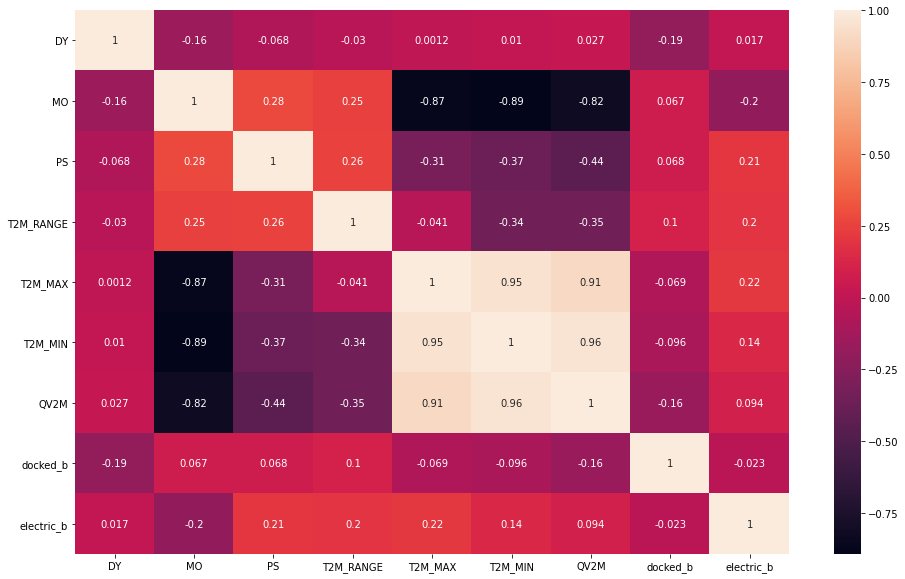

In [930]:
plt.figure(figsize=(16,10))
sns.heatmap(modified.corr(), annot=True)
plt.show()

In [931]:
docked_count = modified['docked_b'].sum()
print (docked_count)
electric_count = modified['electric_b'].sum()
print (electric_count)


609
693


In [932]:
from sklearn.svm import SVC
!pip3 install quandl
!pip3 install sklearn
import quandl, math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

X = np.array(modified.drop(['docked_b','electric_b'], 1))
y = np.array(modified['docked_b'])
X = preprocessing.scale(X)

svclassifier = SVC(kernel='poly', degree=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [933]:
y_pred = svclassifier.predict(X_test)


In [934]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 1 0 0 6 0 0]
 [0 1 1 0 2 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 1 2 0 0]
 [0 0 0 0 4 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 2 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           3       0.33      0.25      0.29         4
           4       0.00      0.00      0.00         5
           5       1.00      0.33      0.50         3
           6       0.19      1.00      0.32         4
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2

    accuracy                           0.23        26
   macro avg       0.22      0.23      0.16        26
weighted avg       0.20      0.23      0.15        26



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [935]:
print(y_pred)
print(y_test)

[3 6 6 6 3 6 6 6 6 6 6 6 6 6 6 6 6 4 3 6 6 6 6 6 6 5]
[ 1  4  1  1  7 10  5 10  1  4  3  4  4  6  3  6  1  3  3  6  1  5  1  6
  4  5]


In [936]:
from sklearn import metrics
scores_regr = metrics.mean_squared_error(y_test, y_pred)
scores_regr

9.346153846153847

In [937]:

X = modified.drop(['docked_b','electric_b'], 1)
y = modified['docked_b']

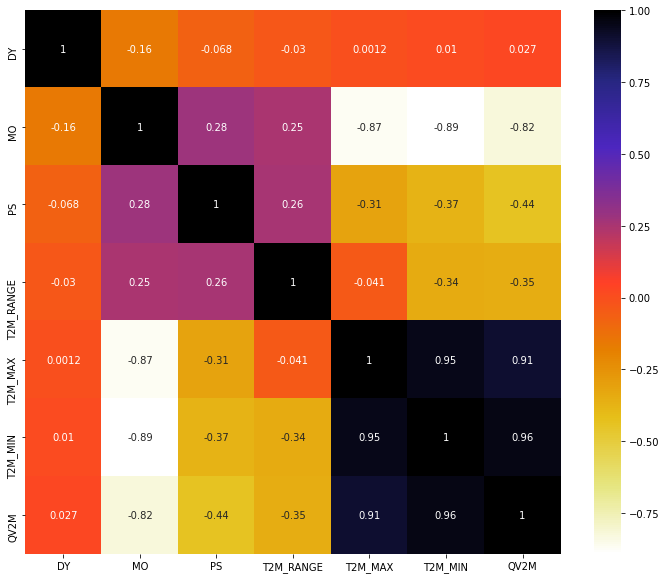

In [938]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [939]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [940]:
corr_features = correlation(X, 0.7)
#h = X.keys()
#h = set(h);
#corr_features = h - corr_features
print(corr_features)
len(set(corr_features))

{'QV2M', 'T2M_MAX', 'T2M_MIN'}


3

In [941]:
X.drop(corr_features,axis=1)

,DY,MO,PS,T2M_RANGE
0,1.0,8.0,0.75,9.18
1,1.0,9.0,1.14,7.04
2,1.0,10.0,0.80,10.22
3,1.0,11.0,1.05,10.10
4,1.0,12.0,0.16,5.20
...,...,...,...,...
125,30.0,9.0,0.42,8.31
126,30.0,10.0,0.82,5.56
127,30.0,11.0,-0.48,12.19
128,31.0,8.0,1.10,5.34


In [942]:
corr_features

{'QV2M', 'T2M_MAX', 'T2M_MIN'}

In [943]:
X = np.array(X)
y = np.array(y)

In [944]:
X = preprocessing.scale(X)

In [945]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [946]:
clf = LinearRegression()

In [947]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred


array([6.08020431, 4.44848634, 6.0893273 , 5.5817579 , 3.00951416,
       4.13303481, 3.67819799, 3.64335284, 3.50321847, 3.3371726 ,
       3.44512862, 6.11781396, 4.68207404, 5.03436525, 3.99127897,
       5.34509265, 4.73609637, 3.79622592, 5.18713498, 4.13755932,
       3.85112758, 4.32514962, 4.33987809, 4.55109904, 4.14530292,
       5.84193201])

In [948]:
confidence = clf.score(X_test, y_test)
print(confidence)

0.011981631438989004


In [949]:
y_test

array([ 4,  1,  6,  6,  4,  6,  1,  1,  2,  9,  7, 12,  4,  6,  2,  4,  7,
        5, 11,  6,  8,  8,  2,  6,  3,  2])

In [950]:
#To retrieve the intercept:
print(clf.intercept_)

#For retrieving the slope:
print(clf.coef_)

4.561780969791129
[  -0.61178159   -0.1910237    -0.2223876    43.05017337 -131.67698925
  141.14774164   -1.64344696]


In [951]:

# evaluate  regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset

#X = np.array(modified.drop(['PS','docked_b','count'], 1))
#y = np.array(modified['docked_b'])
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.07692308 0.23076923 0.07692308 0.07692308 0.30769231 0.15384615
 0.15384615 0.15384615 0.07692308 0.07692308]
Accuracy: 0.138 (0.075)


In [952]:
X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

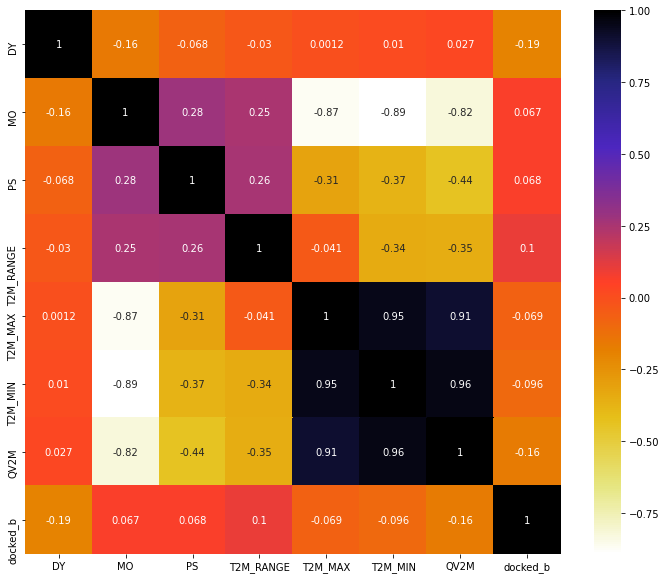

In [953]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [954]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [955]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

3

In [956]:
X.drop(corr_features,axis=1)

,DY,MO,PS,T2M_RANGE,docked_b
0,1.0,8.0,0.75,9.18,7
1,1.0,9.0,1.14,7.04,6
2,1.0,10.0,0.80,10.22,8
3,1.0,11.0,1.05,10.10,2
4,1.0,12.0,0.16,5.20,6
...,...,...,...,...,...
125,30.0,9.0,0.42,8.31,6
126,30.0,10.0,0.82,5.56,6
127,30.0,11.0,-0.48,12.19,2
128,31.0,8.0,1.10,5.34,1


In [957]:
corr_features

{'QV2M', 'T2M_MAX', 'T2M_MIN'}

In [958]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [959]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


-0.12727384058893843


In [960]:
U=clf.predict(X_test)
U

array([6.53399872, 5.07547073, 4.77364713, 5.64932371, 6.62935039,
       5.90702935, 5.44642628, 5.34190894, 5.39604636, 6.39263397,
       4.84777988, 5.09488164, 4.40471818, 6.9744402 , 4.84932735,
       5.40147216, 5.72912348, 2.20016757, 5.81335995, 5.62650816,
       6.3202669 , 5.41762835, 4.51974946, 6.62181162, 6.56239526,
       5.86254223])

In [961]:
y_test

32     6
68     6
69     4
64     3
108    5
128    3
99     4
67     6
78     4
9      7
121    5
61     7
72     5
88     2
14     5
71     7
104    3
28     2
48     6
46     6
73     6
109    5
55     5
20     8
75     6
80     4
Name: electric_b, dtype: int64

In [962]:
clf.score(X_test,y_test)

-0.12727384058893843

In [963]:
from sklearn.model_selection import KFold # import KFold
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
#y = np.array([1, 2, 3, 4]) # Create another array
#X = modified.drop(['PS','electric_b','count'], 1)
#y = modified['electric_b']
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [964]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [965]:
# Perform 6-fold cross validation
cv_4_results = cross_val_score(clf, X, y, cv=10,)
print ('Cross-validated scores:', cv_4_results)
print('mean score', mean(cv_4_results))


Cross-validated scores: [ 0.21541625 -1.40647044  0.10014771 -0.27424106 -0.27352659 -0.28904663
  0.1568256   0.13581281 -0.06025126 -0.3922266 ]
mean score -0.20875602019593437


In [966]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [967]:
X = modified.drop(['MO','electric_b'], 1)
y = modified['electric_b']

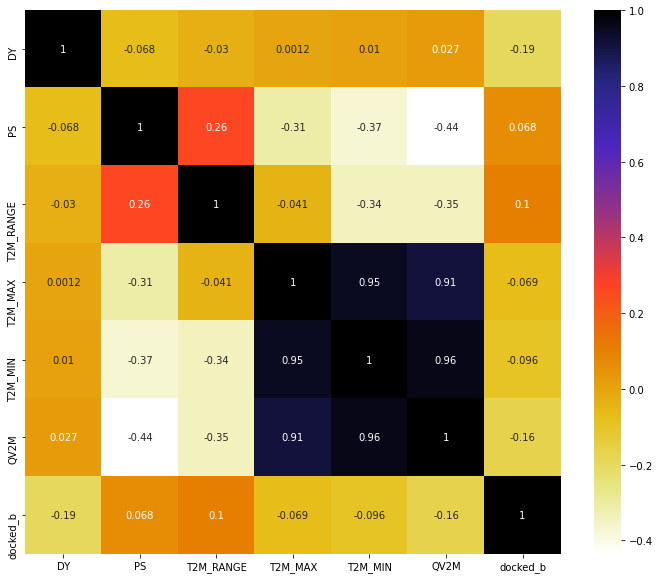

In [968]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [969]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [970]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

2

In [971]:
X.drop(corr_features,axis=1)

,DY,PS,T2M_RANGE,T2M_MAX,docked_b
0,1.0,0.75,9.18,31.66,7
1,1.0,1.14,7.04,26.71,6
2,1.0,0.80,10.22,22.98,8
3,1.0,1.05,10.10,15.09,2
4,1.0,0.16,5.20,7.48,6
...,...,...,...,...,...
125,30.0,0.42,8.31,20.99,6
126,30.0,0.82,5.56,12.43,6
127,30.0,-0.48,12.19,19.45,2
128,31.0,1.10,5.34,24.41,1


In [972]:
corr_features

{'QV2M', 'T2M_MIN'}

In [973]:

X = np.array(X)
y = np.array(y)

In [974]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [975]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [ 13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [976]:
best_svr.fit(X_train, y_train)
scores.append(best_svr.score(X_test, y_test))
print(best_svr.score(X_test, y_test))

-0.10958188623300069


In [977]:
print(np.mean(scores))

-0.11531839271712671
